In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
with open("player_stats.pkl", "rb") as f:
    total_stats = pickle.load(f)

In [5]:
total_stats

,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,MVP,CONF_RANK
0,203518,2017,1610612760,23.0,68,1055.0,134,341,0.393,94,...,68,86,40,37,8,33,114,406,0.0,6
1,203518,2018,1610612760,24.0,75,1134.0,115,291,0.395,84,...,88,114,28,38,8,25,124,353,0.0,4
2,203518,2019,1610612760,25.0,31,588.0,56,157,0.357,41,...,43,48,20,17,6,14,53,165,0.0,6
3,1630173,2021,1610612748,21.0,61,737.0,124,228,0.544,0,...,135,208,29,20,28,43,91,304,0.0,6
4,1630173,2022,1610612761,22.0,26,641.0,85,214,0.397,9,...,138,198,40,14,14,30,57,207,0.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,1627826,2019,1610612747,22.0,33,516.0,112,193,0.580,0,...,108,162,25,4,27,33,73,281,0.0,10
8921,1627826,2019,1610612746,22.0,26,524.0,100,186,0.538,0,...,139,200,38,10,24,37,64,244,0.0,8
8922,1627826,2020,1610612746,23.0,72,1326.0,236,385,0.613,0,...,346,543,82,16,66,61,168,596,0.0,2
8923,1627826,2021,1610612746,24.0,72,1609.0,257,394,0.652,1,...,330,519,90,24,62,81,187,650,0.0,4


In [16]:
#How is unbalanced
total_stats["MVP"].value_counts()

0.0    6815
1.0      11
Name: MVP, dtype: int64

In [17]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.998389
1.0    0.001611
Name: MVP, dtype: float64

/home/thomas/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


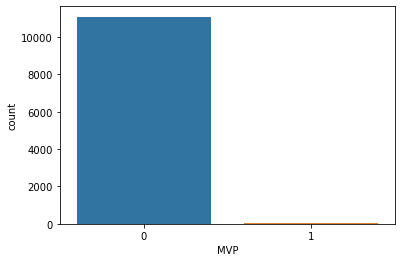

In [5]:
g = sns.countplot(total_stats['MVP'])
g.set_xticklabels(['0','1'])
plt.show()

In [22]:
min(total_stats["GP"])

1

In [23]:
max(total_stats["GP"])

82

(array([ 973.,  572.,  675.,  653.,  512.,  457.,  564.,  682.,  706.,
        1032.]),
 array([1.0, 9.1, 17.2, 25.299999999999997, 33.4, 41.5, 49.599999999999994,
        57.699999999999996, 65.8, 73.89999999999999, 82.0], dtype=object),
 <BarContainer object of 10 artists>)

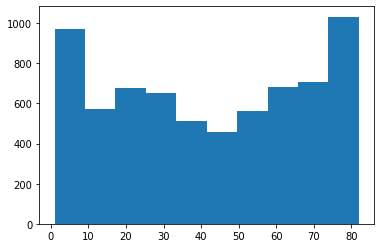

In [27]:
plt.hist(total_stats["GP"])

In [36]:
total_stats["GP"]=total_stats["GP"].astype('int')

In [37]:
total_stats["GP"].value_counts

<bound method IndexOpsMixin.value_counts of 0       68
1       75
2       31
3       61
4       26
        ..
8920    33
8921    26
8922    72
8923    72
8924    35
Name: GP, Length: 6826, dtype: int64>

In [45]:
total_stats=total_stats[total_stats["GP"]>40]

In [46]:
total_stats

,PLAYER_ID,SEASON_ID,TEAM_ID,PLAYER_AGE,GP,MIN,FGM,FGA,FG_PCT,FG3M,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,MVP,CONF_RANK
0,203518,2017,1610612760,23.0,68,1055.0,134,341,0.393,94,...,68,86,40,37,8,33,114,406,0.0,6
1,203518,2018,1610612760,24.0,75,1134.0,115,291,0.395,84,...,88,114,28,38,8,25,124,353,0.0,4
3,1630173,2021,1610612748,21.0,61,737.0,124,228,0.544,0,...,135,208,29,20,28,43,91,304,0.0,6
7,203112,2014,1610612758,23.0,56,786.0,60,127,0.472,2,...,134,201,24,19,23,28,114,152,0.0,13
8,203112,2015,1610612752,24.0,68,1287.0,152,331,0.459,18,...,222,301,68,27,22,60,147,398,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,1627835,2018,1610612741,24.0,54,824.0,81,234,0.346,37,...,118,131,46,20,15,43,86,218,0.0,13
8916,1627790,2019,1610612739,22.0,59,1082.0,183,331,0.553,0,...,212,320,53,13,22,61,113,459,0.0,14
8919,1627826,2018,1610612747,21.0,43,410.0,61,122,0.500,0,...,78,123,25,8,15,26,47,161,0.0,11
8922,1627826,2020,1610612746,23.0,72,1326.0,236,385,0.613,0,...,346,543,82,16,66,61,168,596,0.0,2


In [47]:
total_stats["MVP"].value_counts()

0.0    3499
1.0      11
Name: MVP, dtype: int64

In [48]:
total_stats["MVP"].value_counts(normalize=True)

0.0    0.996866
1.0    0.003134
Name: MVP, dtype: float64